In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import LinearKernel, ConstantKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import WhiteNoiseKernel, GaussKernel
from gaussian_model import Gaussian_Process_Regression

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline
%matplotlib ipympl

ite:1  Abs Err:4701.692268274032  x_new:(np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.49999000005000005))
ite:101  Abs Err:4688.899106128478  x_new:(np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.988940837693804), np.float64(0.4989905100500046))
ite:201  Abs Err:612.0103583450028  x_new:(np.float64(0.9582914042307316), np.float64(0.9586835403759123), np.float64(0.9360658597222846), np.float64(0.9166867757869941), np.float64(0.9563473120880985), np.float64(0.942856247778369), np.float64(0.9867208597103237), np.float64(0.95838

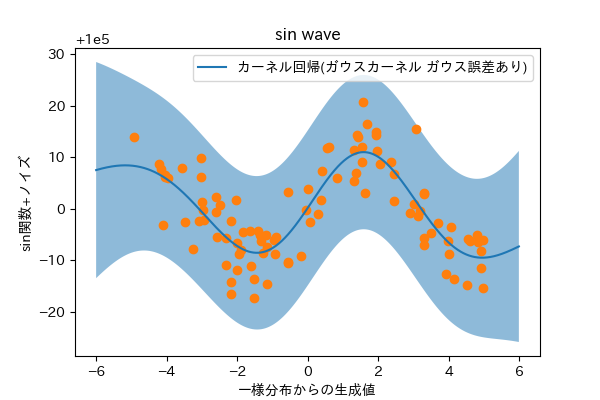

In [3]:
def wave_dataset(size:int, xlim:List=[0, 1], scale:float|None=None) -> pd.DataFrame:
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = 10*np.sin(x) + 100000
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

train_num  = 100
train_data = wave_dataset(train_num, xlim=[-5, 5], scale=5)
X_axis     = np.arange(-6, 6, 0.01)


kernel = LinearKernel(alpha=1) + ConstantKernel(alpha=1)\
		 + ExponentialKernel(alpha=1, beta=1)\
		 + PeriodicKernel(alpha=1, beta=1, gamma=1)\
         + GaussKernel(alpha=1, beta=1)\
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		train_data['x'].values.reshape((-1, 1)), 
            train_data['y'].values.reshape((-1, 1)),
            kernel=kernel, 
            norm_α=10, 
            l1_ratio=0.1, 
            eta=1e-5, 
            tol=1e-6, 
            max_iterate=100000)
# solver = "external library"
# solver = "ISTA"
solver = "OPTIMIZER"
model.fit(solver=solver, useRAdam=False)

pred_mean, pred_std = model.predict(X_axis.reshape((-1, 1)), return_std=True)
pred_mean = pred_mean.reshape(-1)

# データを描画
plt.figure(figsize=(6, 4))
plt.plot(X_axis, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(X_axis, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.5)
plt.scatter(train_data['x'].values, train_data['y'].values, marker='o')
plt.title('sin wave')
plt.xlabel('一様分布からの生成値')
plt.ylabel('sin関数+ノイズ')
plt.legend()
plt.show()

In [4]:
kernel.get_theta()

(np.float64(0.013384793103762307),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.7468704190675245),
 np.float64(1.0618943307343254),
 np.float64(0.31197576206966476))